<a href="https://colab.research.google.com/github/DheerajKondan/Salary_Prediction/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [31]:
dataset1=pd.read_csv('/content/salary_data_cleaned.csv')

dataset1.head(10)

In [32]:
dataset1.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,95.0,CyrusOne\n,TX,1,20,1,0,0,1,1
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,...,73.5,ClearOne Advantage\n,MD,1,12,0,0,0,0,1
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,...,114.0,Logic20/20\n,CA,0,15,1,0,1,1,1
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,61.0,Rochester Regional Health\n,NY,1,6,0,0,0,0,0
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,...,140.0,<intent>\n,NY,1,11,1,0,1,0,0


In [33]:
dataset1.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
dataset1.shape

(742, 28)

In [35]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [36]:
print(dataset1.columns)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')


In [37]:
unique1=dataset1['Type of ownership'].value_counts()
print(unique1)

Type of ownership
Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  3
School / School District            2
Unknown                             1
-1                                  1
Name: count, dtype: int64


In [38]:
print(dataset1['Size'].value_counts())
print("\n\n",dataset1['Job Title'].value_counts())
print("\n\n",dataset1['Rating'].value_counts())
print("\n\n",dataset1['Company Name'].value_counts())
print("\n\n",dataset1['Location'].value_counts())
print("\n\n",dataset1['Sector'].value_counts())

Size
1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: count, dtype: int64


 Job Title
Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: count, Length: 264, dtype: int64


 Rating
 3.9    63
 3.8    61
 3.7    61
 3.5    49
 4.0    47
 3.6    46
 3.4    44
 3.3    39
 3.2    35
 4.4    33
 4.3    32
 4.7    31
 4.2    26
 3.1    25
 4.1    19
 2.9    18
 3.0    17
 2.7    14
 

In [39]:
x=dataset1.iloc[:,-6:-1]
print(x)

     age  python_yn  R_yn  spark  aws
0     47          1     0      0    0
1     36          1     0      0    0
2     10          1     0      1    0
3     55          1     0      0    0
4     22          1     0      0    0
..   ...        ...   ...    ...  ...
737  190          0     0      0    1
738   14          1     0      1    1
739   36          0     0      0    0
740   -1          0     0      0    0
741   53          1     0      0    0

[742 rows x 5 columns]


In [40]:
y=dataset1.iloc[:,-10]
print(y)

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
737     84.5
738    102.5
739     73.5
740    127.5
741     93.5
Name: avg_salary, Length: 742, dtype: float64


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=110)

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [43]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(556, 5)
(186, 5)
(556,)
(186,)


In [45]:
from sklearn.linear_model import LinearRegression
cla=LinearRegression()

In [46]:
cla.fit(x_train,y_train)

LinearRegression()

In [47]:
pred = cla.predict(x_test)

In [48]:
print(len(y_test), len(pred))

186 186


In [49]:
print(pred)

[109.68373061  86.14626818 105.22593303  94.59766606 119.53929512
  86.55987826 100.68941365 119.40142509 106.42080661 122.0669123
  96.28220327 110.69014696  86.42200824 119.68179567 100.22984689
  91.28878538 111.98156442 111.98156442 113.89125448 114.59646443
 110.91993034  88.0304919   88.07644858 107.15611342 119.67716515
  85.54883139 106.42080661 111.3794971   95.27115639 113.61551443
 114.02912451  88.44410198 105.68549979  88.12240525  95.22519972
 110.78206031 119.17164171 118.30309539 105.82336982  87.84666519
  86.69774829 119.58525179 109.72968729 106.55867664  85.54883139
 105.17997635 107.61568019  86.42200824 105.04210632 119.7690785
 115.7754782  107.61568019  87.15731505 100.22984689 126.70853659
  87.15731505 120.13673191  87.01944502  87.01944502  86.05435483
 121.21422579  87.61688181  88.30623196 105.22593303  86.69774829
  86.51392159  88.30623196  85.54883139 105.40975973  86.42200824
 108.67268374 114.30486457  88.16836193 110.4144069  111.97693389
 105.4097597

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1445.413282327135


In [51]:
print("Unique values in y_test:", np.unique(y_test))
print("\n\n\nUnique values in pred_classes:", np.unique(pred))

Unique values in y_test: [ 13.5  20.5  21.5  25.   26.5  27.5  29.5  31.5  37.5  44.5  47.5  48.
  48.5  50.   52.5  54.   55.   56.5  58.   58.5  60.   60.5  61.5  62.
  62.5  63.5  64.   64.5  65.   65.5  67.   68.5  69.   69.5  70.   71.
  71.5  72.5  73.   73.5  75.5  76.5  77.5  79.   80.   80.5  81.   81.5
  83.   84.   84.5  85.   85.5  86.   87.   87.5  88.5  89.   90.   91.
  91.5  92.   93.5  95.   95.5  98.   98.5  99.   99.5 100.5 101.  104.5
 105.  105.5 107.  107.5 108.  109.  111.5 112.  113.  113.5 114.  114.5
 115.  118.  120.  121.  122.  122.5 124.  128.5 129.5 130.  132.5 133.
 134.  134.5 137.  139.  139.5 140.  140.5 142.5 143.  143.5 145.5 147.
 149.5 150.5 153.  153.5 154.5 161.5 162.  164.5 169.  171.5 177.  180.
 184.5 194.  205.  225.  237.5 254. ]



Unique values in pred_classes: [ 85.54883139  85.73265809  85.82457145  85.9164848   85.96244147
  86.00839815  86.05435483  86.14626818  86.28413821  86.33009488
  86.42200824  86.46796491  86.51392159  86.5598

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [53]:
threshold = 0.25
pred_classes = (pred > threshold).astype(int)
confusion_matrix(y_test.astype(int), pred_classes)


array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [54]:
accuracy_score(y_test.astype(int),pred_classes)

0.0

In [55]:
cla.intercept_

101.01348920863309

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.17766053636847112

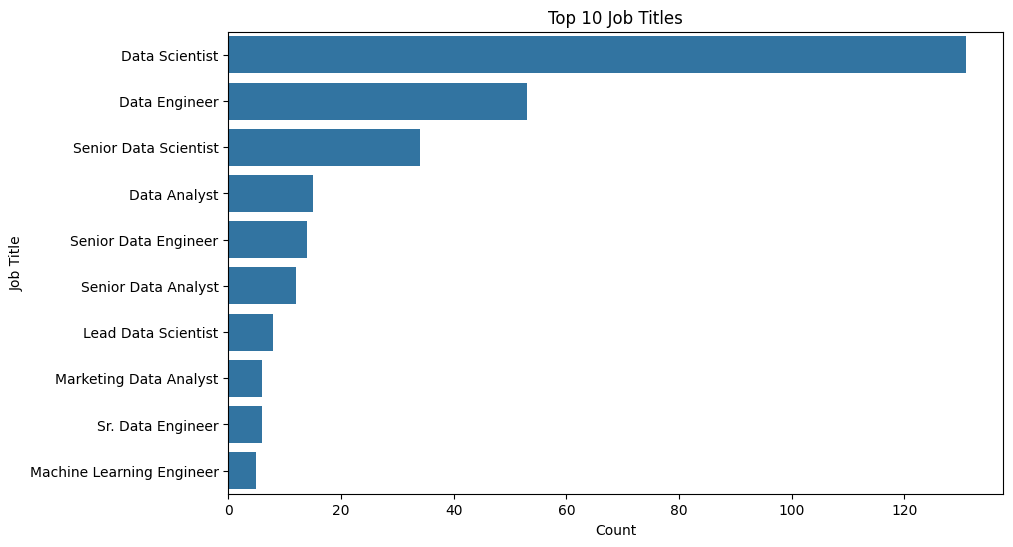

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences of each job title
job_title_counts = dataset1['Job Title'].value_counts()

# Plot the top 10 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=job_title_counts.head(10), y=job_title_counts.head(10).index, orient='h')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

In [58]:
average_salary = dataset1.groupby('Job Title')['max_salary'].mean().sort_values(ascending=False).head(15)

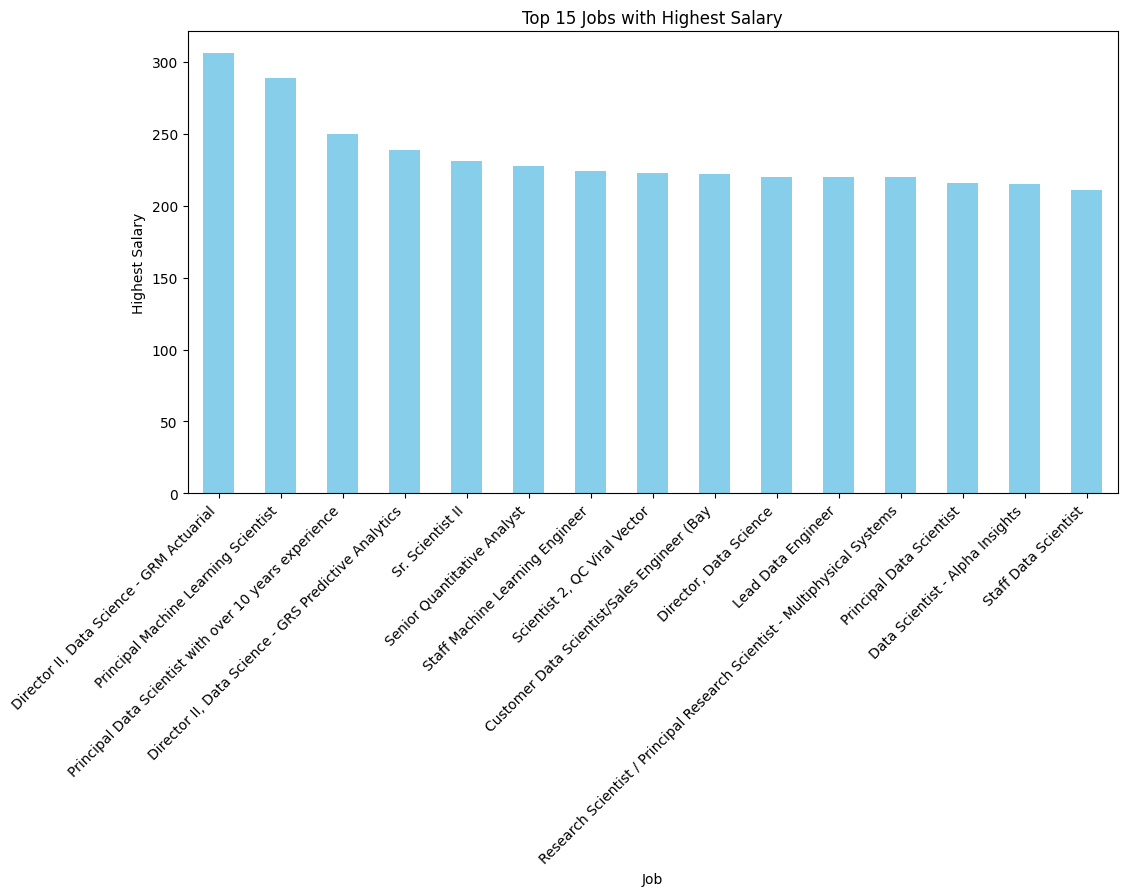

In [59]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
average_salary.plot(kind='bar', color='skyblue')
plt.title('Top 15 Jobs with Highest Salary')
plt.xlabel('Job')
plt.ylabel('Highest Salary')
plt.xticks(rotation=45, ha='right')
plt.show()


In [60]:
jobs_between_20_and_22 = dataset1.loc[(dataset1['age'] <= 22) & (dataset1['age'] >= 20)]
jobs_between_20_and_22.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,95.0,CyrusOne\n,TX,1,20,1,0,0,1,1
48,Spectral Scientist/Engineer,$56K-$117K (Glassdoor est.),Thank you for your interest in joining the Cen...,4.7,Centauri\n4.7,"Beavercreek, OH","Chantilly, VA",501 to 1000 employees,1999,Company - Private,...,86.5,Centauri\n,OH,0,21,0,0,0,0,0
59,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,95.0,CyrusOne\n,TX,1,20,1,0,0,1,1
67,Data Scientist - Research,$41K-$72K (Glassdoor est.),Do you have a passion for using data science t...,3.1,C Space\n3.1,"Boston, MA","Boston, MA",201 to 500 employees,1999,Company - Public,...,56.5,C Space\n,MA,1,21,1,0,0,0,0


In [61]:
import plotly.express as px
import plotly.graph_objects as go

In [62]:
dataset1_cleaned = dataset1[dataset1['Rating'] >= 0]  # Remove rows with negative Rating values
figure = px.scatter(data_frame=dataset1_cleaned, x="avg_salary", y="Rating", size="Rating", trendline='ols')

In [63]:
figure

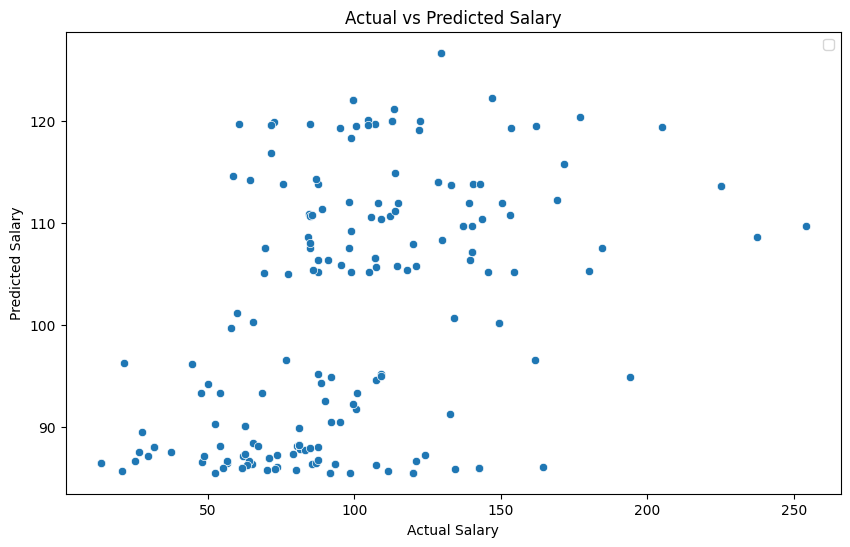

In [64]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,6]

In [66]:
np.sqrt(x['age']).skew()

0.9529808791062394

In [67]:
np.sqrt(x['python_yn']).skew()

-0.1136191593324888

In [68]:
pd.Series(pd.Series(stats.yeojohnson(x['age']))[0]).skew()

0.03362290701367033

In [69]:
pd.Series(pd.Series(stats.yeojohnson(x['age']))[0])

,0
0,6.988594
1,6.246171
2,3.418367
3,7.454498
4,5.022231
...,...
737,11.975917
738,4.052661
739,6.246171
740,-1.333869


In [70]:
for i in x.columns:
  x.loc[:,i].fillna(x.loc[:,i].median(),inplace=True)

In [71]:
for i in x.columns:
  print("The skewness of",i,"is: ",x.loc[:,i].skew())

The skewness of age is:  1.7866182101030732
The skewness of python_yn is:  -0.1136191593324888
The skewness of R_yn is:  19.222277430318147
The skewness of spark is:  1.3193114818163203
The skewness of aws is:  1.2381674833553897


In [72]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()
model_list=[dt,rf,knn,gnb]
train_acc=[]
test_acc=[]
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

model_list = [RandomForestRegressor(), GradientBoostingRegressor(), LinearRegression()]

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

train_mae, test_mae, train_mse, test_mse, train_r2, test_r2 = [], [], [], [], [], []

for i in model_list:
    i_model = i.fit(x_train, y_train)
    y_train_pred = i_model.predict(x_train)
    y_test_pred = i_model.predict(x_test)

    # Regression metrics
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))



In [73]:
print(train_acc)
print(test_acc)
print(train_mae)
print(test_mae)
print(train_mse)
print(test_mse)
print(train_r2)
print(test_r2)

[]
[]
[16.65221084209577, 22.653042517924078, 28.61562616965726]
[26.982571778932314, 26.54955835027791, 28.85394369241078]
[570.9496870210265, 861.9694583207204, 1280.0306679982498]
[1446.769262462386, 1319.4794481098836, 1445.413282327135]
[0.5989225783701548, 0.39448869887160987, 0.10081148724938405]
[0.17688907813520927, 0.24930811491883753, 0.17766053636847112]


In [74]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()
model_dict={'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

{'Model': [RandomForestRegressor(),
  GradientBoostingRegressor(),
  LinearRegression()],
 'Train Score': [],
 'Test Score': []}

In [75]:
model_summary=pd.DataFrame({'Model':model_list,'Train Score':train_mae,'Test Score':test_mae})
model_summary

,Model,Train Score,Test Score
0,"(DecisionTreeRegressor(max_features=1.0, rando...",16.652211,26.982572
1,([DecisionTreeRegressor(criterion='friedman_ms...,22.653043,26.549558
2,LinearRegression(),28.615626,28.853944


In [76]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Define parameters
params = {
    'criterion': ['mse', 'friedman_mse'],
    'max_depth': range(2, 7),
    'min_samples_leaf': range(2, 10)
}

# Instantiate GridSearchCV
grd = GridSearchCV(estimator=dt, param_grid=params, cv=3)

# Fit the model
grd_model = grd.fit(x_train, y_train)

# Get the best parameters
best_params = grd_model.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 3, 'min_samples_leaf': 4}


In [77]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

bg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, oob_score=True)
bg_model = bg.fit(x_train, y_train)
y_pred_train = bg_model.predict(x_train)
y_pred_test = bg_model.predict(x_test)

# Regression metric (e.g., Mean Squared Error)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")


Train MSE: 597.2687959498724
Test MSE: 1563.9008537255108


In [78]:
pd.DataFrame({'model':['Logistic Regression','Decesion Tree','Random Forest','KNeighbors Classifier','Gaussian Naive-Bauyes'],
           'train_score':mse_train,'test_score':mse_test})

,model,train_score,test_score
0,Logistic Regression,597.268796,1563.900854
1,Decesion Tree,597.268796,1563.900854
2,Random Forest,597.268796,1563.900854
3,KNeighbors Classifier,597.268796,1563.900854
4,Gaussian Naive-Bauyes,597.268796,1563.900854


In [79]:
import plotly.express as px
fig = px.scatter_3d(dataset1,x='min_salary',y='max_salary',z='avg_salary',color='max_salary',
                    size='min_salary',title="size--> min_salary    color--> max_salary" )
fig.show()

In [80]:
class Display:
    def counts_value(first_value,second_value):
        print(f"{first_value} unique count --> {len(dataset1[first_value].value_counts())}")
        print(f"{second_value} unique count --> {len(dataset1[second_value].value_counts())}")


    def draw(x,y):
        fig = px.scatter_3d(dataset1,x=x,y=y,z='avg_salary',color=x,
                            size='avg_salary',title=f"size--> avg_salary    color--> {x}" )
        fig.show()
# Display.counts_value('Type of ownership','Industry')
Display.draw(x='Type of ownership', y='Industry')
# Display.counts_value('hourly','job_state')
Display.draw(x='job_state', y='hourly')